In [83]:
import pandas as pd

In [84]:
banking = pd.read_csv('banking.csv')

In [85]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [86]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

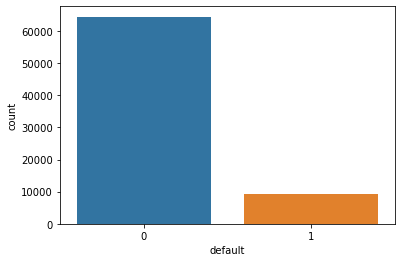

In [87]:
sns.countplot(x = 'default', data = banking)

In [88]:
banking.income.value_counts()

30000     7009
25000     6061
20000     5471
40000     4935
50000     4470
          ... 
37600        1
27350        1
27478        1
53800        1
426000       1
Name: income, Length: 966, dtype: int64

In [89]:
banking.bki_request_cnt.value_counts()

0     19381
1     18276
2     13749
3      9187
4      5627
5      3268
6      1704
7       852
8       508
9       299
10      225
11      188
12      144
13       94
14       86
15       54
16       35
18       22
17       19
19       18
21       12
24       11
20        9
23        7
28        4
22        4
32        2
27        2
26        2
25        2
46        1
29        1
33        1
34        1
36        1
41        1
45        1
53        1
Name: bki_request_cnt, dtype: int64

In [90]:
banking.foreign_passport.value_counts()

N    62733
Y    11066
Name: foreign_passport, dtype: int64

In [91]:
banking.good_work.value_counts()

0    61630
1    12169
Name: good_work, dtype: int64

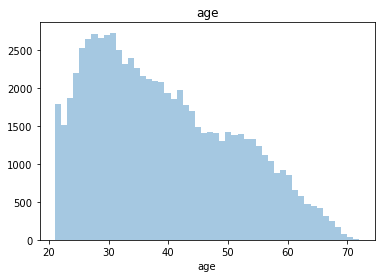

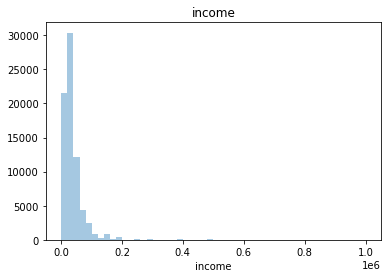

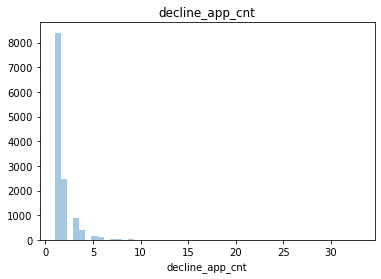

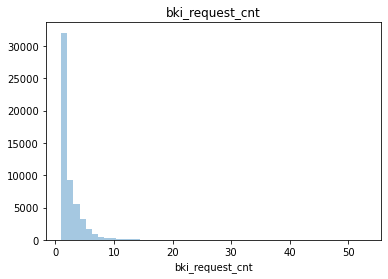

In [92]:
for i in ['age','income','decline_app_cnt','bki_request_cnt']:
    plt.figure()
    sns.distplot(banking[i][banking[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [93]:
len(banking.columns)

14

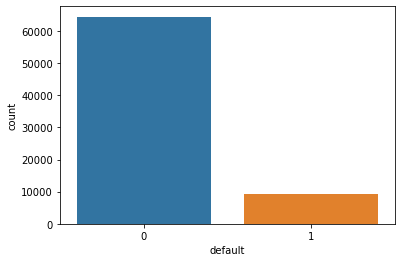

In [94]:
sns.countplot(x = 'default', data = banking)

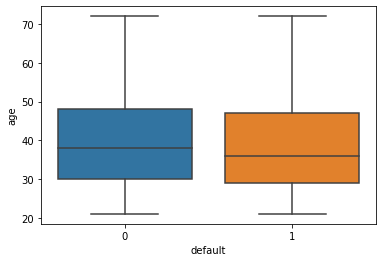

In [95]:
sns.boxplot(x = 'default', y = 'age', data = banking)

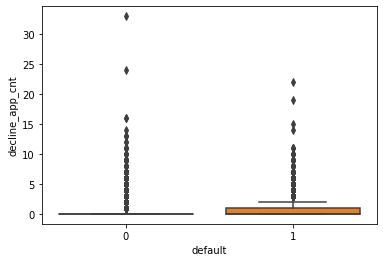

In [96]:
sns.boxplot(x = 'default', y = 'decline_app_cnt', data = banking)

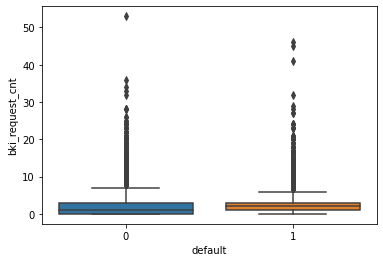

In [97]:
sns.boxplot(x = 'default', y = 'bki_request_cnt', data = banking)

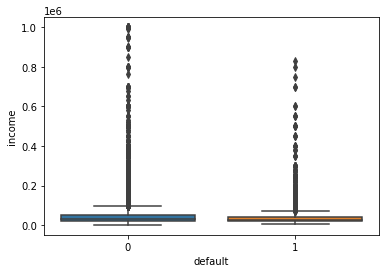

In [98]:
sns.boxplot(x = 'default', y = 'income', data = banking)

In [99]:
num_cols = ['age','decline_app_cnt','bki_request_cnt','income']

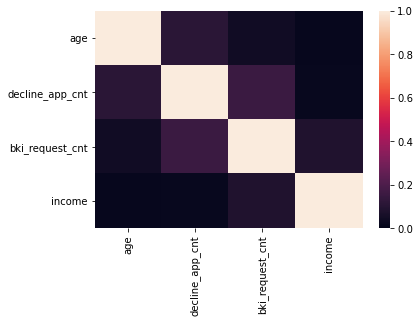

In [100]:
sns.heatmap(banking[num_cols].corr().abs(), vmin=0, vmax=1)

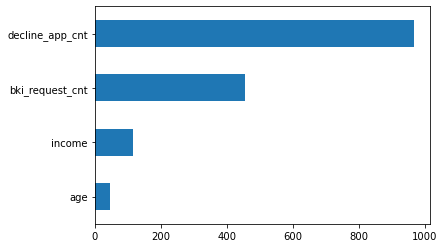

In [101]:
from sklearn.feature_selection import f_classif
imp_num = pd.Series(f_classif(banking[num_cols], banking['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [102]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(banking['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [103]:
bin_cols = ['sex','car','car_type','foreign_passport','good_work']

In [104]:
cat_cols = ['education','home_address','work_address']

In [105]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    banking[column] = label_encoder.fit_transform(banking[column])
    
# убедимся в преобразовании    
banking.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,SCH,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,SCH,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,SCH,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,GRD,1,48,0,0,0,1,1,2,3,30000,1,0


In [106]:
from sklearn.feature_selection import mutual_info_classif

In [107]:
banking['education'].value_counts()

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

banking['education'] = banking['education'].apply(lambda x: 0 if x == 'SCH' else(
    1 if x == 'GRD' else(2 if x == 'UGR' else (3 if x == 'PGR' else 4))))

imp_cat = Series(mutual_info_classif(banking[bin_cols + cat_cols], banking['default'],
                                     discrete_features=True), index=bin_cols + cat_cols)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

In [108]:
banking['education'].fillna('Not_given', inplace = True)

In [109]:
X_cat = OneHotEncoder(sparse = False).fit_transform(banking[cat_cols].values)

In [110]:
banking['education'].value_counts()

SCH          38860
GRD          23365
UGR           9816
PGR           1257
Not_given      307
ACD            194
Name: education, dtype: int64

In [116]:
len(X_cat[0])

12

In [118]:
X_cat.shape

(73799, 12)

In [120]:
from sklearn.preprocessing import StandardScaler

In [122]:
X_num = StandardScaler().fit_transform(banking[num_cols].values)

In [130]:
X = np.hstack([X_num, banking[bin_cols].values, X_cat])
Y = banking['default'].values

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [132]:
from sklearn.linear_model import LogisticRegression

In [136]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

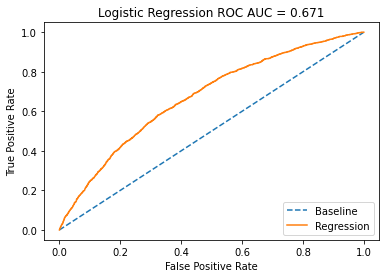

In [137]:
probs = logreg.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Регуляризация

In [138]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

C:\Users\Dmitry Trushin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dmitry Trushin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dmitry Trushin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dmitry Trushin\anaco

C:\Users\Dmitry Trushin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dmitry Trushin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Dmitry Trushin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dmitry Trushin\anaco

Лучшее Penalty: l2
Лучшее C: 2.7825594022071245


C:\Users\Dmitry Trushin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


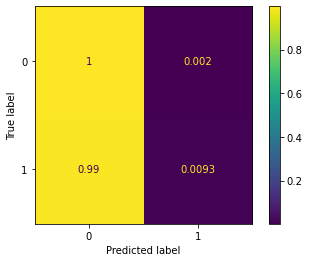

In [143]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=2.7825594022071245, max_iter = 1000)
X = np.hstack([X_num, banking[bin_cols].values, X_cat])
Y = banking['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, normalize='true')  
plt.show()

Лучшее Penalty: l2
Лучшее C: 1.0


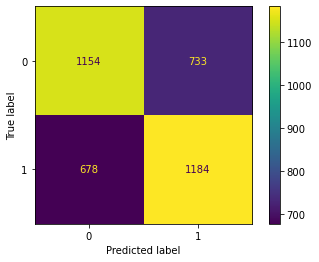

In [146]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
banking = pd.read_csv('banking.csv')
# Зполним education самым распространенным значением
banking.fillna(banking.education.value_counts().index[0], inplace=True)
banking.drop(['client_id'], axis=1, inplace=True)
# сбаланисруем модель
shape = banking.default.value_counts().values[1] # 9372 количество меньшего 
banking_big = banking[banking.default == 0].iloc[: shape] 
banking_min = banking[banking.default ==1]
# объеденим 
banking = pd.concat([banking_big, banking_min])
# Для бинарных признаков мы будем использовать LabelEncoder
label_encoder = LabelEncoder()
bin_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'foreign_passport']
for column in bin_cols:
    banking[column] = label_encoder.fit_transform(banking[column])
# выделим числовые признаки
num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt']
# выделим категриальные признаки
cat_cols = ['education', 'home_address', 'work_address']
# Преобразуем катергориальные переменные в разряженную матрицу по методу getdummies
X_cat = OneHotEncoder(sparse = False).fit_transform(banking[cat_cols].values)
# Стандартизация числовых переменных
X_num = StandardScaler().fit_transform(banking[num_cols].values)
X = np.hstack([X_num, banking[bin_cols].values, X_cat])
Y = banking['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
# Добавим типы регуляризации
penalty = ['l1', 'l2']
# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)
# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)
model = LogisticRegression()
model.fit(X_train, y_train)
# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])
model = LogisticRegression(C=1, penalty='l2')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)  
plt.show() 